# 연습문제


## numpy

python에서 array등을 다루는 수학/과학 컴퓨팅을 하기 위한 패키지

## matplotlib

python에서 matlab과 유사한 그래프 표시를 가능하게 하는 패키지

In [1]:
# Cell 클릭 후 Shift+Enter로 실행 (Comment는 #으로 시작)

# Install necessary packages
!pip install numpy
!pip install matplotlib

## numpy
(본 cell은 markdown 형식으로, 더블클릭/Enter로 들어가고 Shift+Enter로 나갈 수 있다. 주석 용으로 사용.)  

python에서 과학 컴퓨팅을 하기 위해 사용하는 패키지로 python 라이브러리로 Import 하여 사용.

In [2]:
# 패키지 사용을 위한 약자 지정

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Lab_1: Perceptron
---
Perceptron 알고리즘 구현하기
아래 이름, 학번을 작성하세요.

In [3]:
lab1_student_id = '20151519'
lab1_student_name = '고우준'

## Practice 1

아래의 train_perceptron 알고리즘을 구현하시오.

```np.random.seed``` 

random number(난수) 발생을 위한 조건 설정. 괄호 안의 숫자에 따라 난수 생성 방식이 다르게 고정됨

(https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.seed.html)



In [4]:
# Do not change
np.random.seed(5)

```np.random.multivariate_normal```

multivariate normal distribution 으로부터 random sample 을 추출

https://numpy.org/doc/stable/reference/random/generated/numpy.random.multivariate_normal.html

In [5]:
num_data = 20

# feature dataset

class_zeros = np.random.multivariate_normal(mean=[0, 0], cov=[[1., .95],[.95, 1.]], size=num_data)
class_ones = np.random.multivariate_normal(mean=[1, 5], cov=[[1., .85],[.85, 1.]], size=num_data)

print(f'class_zeros: \n{class_zeros} \nclass_ones: \n{class_ones}')

class_zeros: 
[[-3.83362070e-01 -4.87992399e-01]
 [-2.36033497e+00 -2.44005350e+00]
 [-3.58443281e-01  1.41981188e-01]
 [ 9.91341033e-01  8.04249095e-01]
 [-1.33086323e-01 -2.37400363e-01]
 [ 1.21015451e+00  1.14536687e+00]
 [ 2.58897957e-01  4.49732434e-01]
 [ 1.75455499e+00  1.53313893e+00]
 [-1.43057734e+00 -8.43237710e-01]
 [ 1.39021091e+00  1.59412960e+00]
 [ 1.10375308e+00  8.32792324e-01]
 [ 9.27716082e-01  7.94107344e-01]
 [-1.09654919e+00 -8.71261800e-01]
 [-9.55767122e-04 -1.15844755e-01]
 [ 1.35016013e-02 -1.99965457e-02]
 [-6.83217166e-01 -8.82937652e-01]
 [ 2.20971746e-02 -9.86321054e-03]
 [ 1.22453888e-02  9.10549322e-02]
 [-4.06231793e-01  1.58843897e-02]
 [-1.61117147e-01  3.32682722e-01]] 
class_ones: 
[[ 1.42499215  5.16332788]
 [ 0.80577228  5.00045395]
 [ 0.38687635  5.09451383]
 [-0.23119307  4.03962309]
 [ 1.35103223  5.29592348]
 [-0.41995562  3.70123025]
 [ 2.44950645  6.07181602]
 [ 1.23989017  5.87097871]
 [ 0.48411129  5.72202275]
 [ 0.33430386  4.40266337]
 

```np.vstack, np.hstack```

배열을 각각 vertically, horizontally stacking 함


https://numpy.org/doc/stable/reference/generated/numpy.vstack.html?highlight=vstack#numpy.vstack

https://numpy.org/doc/stable/reference/generated/numpy.hstack.html?highlight=hstack#numpy.hstack

In [6]:
biases = np.ones((2 * num_data, 1))

class_data = np.vstack((class_zeros, class_ones)).astype(np.float32)

features = np.hstack((biases, class_data))

print(f'biases: \n{biases} \nclass_data: \n{class_data} \nfeatures: \n{features}')
print(f'biases.shape: \n{biases.shape} \nclass_data.shape: \n{class_data.shape} \
\nfeatures.shape: \n{features.shape}')

biases: 
[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]] 
class_data: 
[[-3.8336208e-01 -4.8799241e-01]
 [-2.3603349e+00 -2.4400535e+00]
 [-3.5844329e-01  1.4198118e-01]
 [ 9.9134105e-01  8.0424911e-01]
 [-1.3308632e-01 -2.3740037e-01]
 [ 1.2101545e+00  1.1453669e+00]
 [ 2.5889796e-01  4.4973242e-01]
 [ 1.7545550e+00  1.5331390e+00]
 [-1.4305774e+00 -8.4323770e-01]
 [ 1.3902109e+00  1.5941296e+00]
 [ 1.1037531e+00  8.3279234e-01]
 [ 9.2771608e-01  7.9410732e-01]
 [-1.0965492e+00 -8.7126178e-01]
 [-9.5576711e-04 -1.1584476e-01]
 [ 1.3501601e-02 -1.9996546e-02]
 [-6.8321717e-01 -8.8293767e-01]
 [ 2.2097174e-02 -9.8632108e-03]
 [ 1.2245389e-02  9.1054931e-02]
 [-4.0623179e-01  1.5884390e-02]
 [-1.6111715e-01  3.3268273e-01]
 [ 1.4249922e+00  5.1633277e+00]
 [ 8.0577230e-01  5.0004539e+00]
 [ 3.86876

In [7]:
# Label dataset

label_zeros = np.zeros((num_data, 1))
label_ones = np.ones((num_data, 1))

labels = np.vstack((label_zeros, label_ones))
dataset = np.hstack((features,labels))

print(f'labels: \n{labels} \ndataset: \n{dataset}')

labels: 
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]] 
dataset: 
[[ 1.00000000e+00 -3.83362085e-01 -4.87992406e-01  0.00000000e+00]
 [ 1.00000000e+00 -2.36033487e+00 -2.44005346e+00  0.00000000e+00]
 [ 1.00000000e+00 -3.58443290e-01  1.41981184e-01  0.00000000e+00]
 [ 1.00000000e+00  9.91341054e-01  8.04249108e-01  0.00000000e+00]
 [ 1.00000000e+00 -1.33086324e-01 -2.37400368e-01  0.00000000e+00]
 [ 1.00000000e+00  1.21015453e+00  1.14536691e+00  0.00000000e+00]
 [ 1.00000000e+00  2.58897960e-01  4.49732423e-01  0.00000000e+00]
 [ 1.00000000e+00  1.75455499e+00  1.53313899e+00  0.00000000e+00]
 [ 1.00000000e+00 -1.43057740e+00 -8.43237698e-01  0.00000000e+00]
 [ 1.00000000e+00  1.39021087e+00  1.59412956e+00  0.00000000e+00]
 [ 1.00000000e+00  1.10375309e+00  8.32792342e-01  0.00000000e+00]
 [

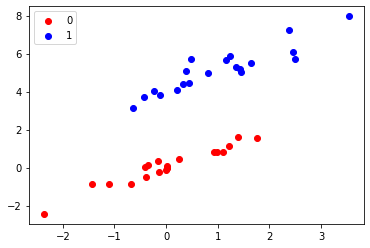

In [8]:
plt.scatter(features[:, 1][:num_data], features[:, 2][:num_data], c = 'r', label='0')
plt.scatter(features[:, 1][num_data:], features[:, 2][num_data:], c = 'b', label='1')

plt.legend()
plt.show()

In [9]:
# dataset shuffling
np.random.shuffle(dataset)

split_ratio = 0.7

# splitting dataset
train = dataset[0:int(split_ratio * (num_data * 2))]
test = dataset[int(split_ratio * (num_data * 2)):(num_data * 2)]

print(train.shape, test.shape)

(28, 4) (12, 4)


In [10]:
# reshaping data
x_train = train[:, 0:3]
y_train = train[:, 3]

x_test = test[:, 0:3]
y_test = test[:, 3]

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(28, 3) (28,)
(12, 3) (12,)


In [11]:
print(x_train[0])
print(y_train[0])

[ 1.         -0.12344763  3.83624363]
1.0


In [12]:
# Todo: practice 1
def train_perceptron(w, x, y, epoch=30):#w는 weight, x는 x_train, y는 y_train으로 label 값
    for i in range(epoch):#epoch는 한번 모든 x_train에 대해서 Error 여부를 확인하는 training step
        idx=0#y_train을 위한 index parameter
        misclassified_sum=np.zeros(len(x[0]))#misclassified된 데이터에 대해서 xy값을 저장하기 위한 parameter
        for sample in x:#sample은 각각의 x 데이터
            if y[idx]==0:#y[idx]은 현재 x_train에 대한 label값으로 0의 경우 -1로 간주
                wxy=-sample.dot(w.T)#y=-1일때 wxy값을 계산
                #y=1 if wx>=0
                #y=-1 if wx<0
                #합쳐서 wxy>=0이 된다
                if wxy<0:#위에서 wxy>=0라고 했는데 wxy<0의 경우 잘못된 경우라서 제대로 분류되지 않은 경우
                    misclassified_sum+=(-sample)
                    #Error=-misclassified_sum(wxy)인데 이 식을 weight에 대해서 편미분하면 -misclassified_sum(xy)
                    #weight를 update할 때 weight=weight-Error의 변화량=weight+misclassified_sum(xy)
                    #sample은 x이기 때문에 y=-1인 경우 sample에 -1을 곱해서 xy를 계산한 후 misclassified_sum에 더한다
            else:#label값이 1인 경우
                wxy=sample.dot(w.T)#y=1일때 wxy값을 계산
                if wxy<0:#제대로 분류되지 않은 경우
                    misclassified_sum+=sample#y=1인 경우이므로 xy는 그대로 x자체라서 sample을 그대로 misclassified_sum에 더한다
            idx+=1#다음 y_train
        w+=misclassified_sum
        #모든 데이터에 대해서 이번 epoch 때의 misclassified_sum을 구했으면 weight=weight+misclassified_sum(xy) 식을 통해 weight update
    
    return w

In [13]:
# w 와 x1 을 이용해 x2 값을 구함

def x2(x1, w):
    w0 = w[0]
    w1 = w[1]
    w2 = w[2]
    x2 = []
    for i in range(len(x1 - 1)):
        x2_temp = (-w0 -w1 * x1[i]) / w2
        x2.append(x2_temp)
    return x2

# visualizaing decision boundary

def show_plt(w, class_data, labels):
#   w and class_data are 2-element with no bias, and 3-element with bias
    len_w = len(w)
    sh_data = class_data.shape
    if len_w != sh_data[1]:
        print('error: w and data dimension does not match')
        return
    
    if len_w == 3:
        class_data = class_data[:,1:]
        
    min = np.min(class_data[:, 0])
    max = np.max(class_data[:, 0])
    
    x1 = np.linspace(min, max, 100)
    x1 = x1.reshape(len(x1),1)
    x_2 = np.asarray(x2(x1, w))
    
    data_zeros = class_data[labels == 0]
    data_ones = class_data[labels == 1]
    
    plt.scatter(data_zeros[:, 0], data_zeros[:, 1], c = 'r', label='0')
    plt.scatter(data_ones[:, 0], data_ones[:, 1], c = 'b', label='1')
    plt.plot(x1, x_2)

    plt.legend()
    plt.show()
    

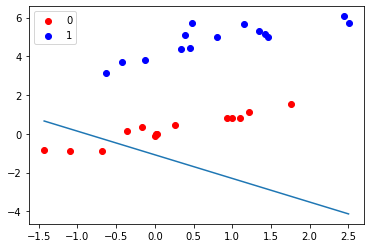

In [14]:
w = np.random.rand(len(x_train[0]))


show_plt(w, x_train, y_train)

In [15]:
w = train_perceptron(w, x_train, y_train)

print("The weights are:", w)

# Do not change
lab1_student_answer_w = w

The weights are: [-29.17999874 -18.31183293  38.29983915]


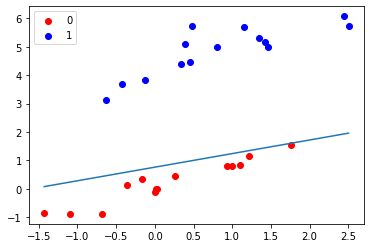

In [16]:
show_plt(w, x_train, y_train)

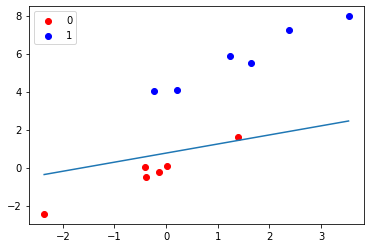

In [17]:
show_plt(w, x_test, y_test)

## Practice 2

hyperplane이 구해지는 최소 epoch를 출력할 수 있도록 train_perceptron 코드를 수정하시오.

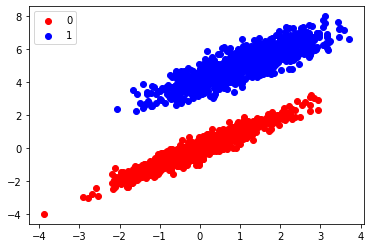

In [18]:
num_data = 1000

class_zeros = np.random.multivariate_normal(mean=[0,0], cov=[[1.,.95],[.95,1.]], size=num_data)
class_ones = np.random.multivariate_normal(mean=[1,5], cov=[[1.,.85],[.85,1.]], size=num_data)

biases = np.ones((2 * num_data, 1))

class_data = np.vstack((class_zeros, class_ones)).astype(np.float32)

features = np.hstack((biases, class_data))

label_zeros = np.zeros((num_data, 1))
label_ones = np.ones((num_data, 1))

labels = np.vstack((label_zeros, label_ones))
dataset = np.hstack((features,labels))

plt.scatter(features[:, 1][:num_data], features[:, 2][:num_data], c = 'r', label='0')
plt.scatter(features[:, 1][num_data:], features[:, 2][num_data:], c = 'b', label='1')

plt.legend()
plt.show()

In [19]:
np.random.shuffle(dataset)

split_ratio = 0.7

train = dataset[0:int(split_ratio * (num_data * 2))]
test = dataset[int(split_ratio * (num_data * 2)):(num_data * 2)]

x_train = train[:, 0:3]
y_train = train[:, 3]

x_test = test[:, 0:3]
y_test = test[:, 3]


# Todo: practice 2
def train_perceptron(w, x, y, epoch=30):#w는 weight, x는 x_train, y는 y_train으로 label 값
    #min_epoch, epoch_update_flag, stopflag 사용 빼고는 practice 1과 같은 코드
    min_epoch = epoch#min_epoch는 weight update가 끝나는 최소 epoch
    epoch_update_flag=0#weight가 더이상 update 안되고 min_epoch를 이미 구한 상황을 알기 위한 parameter
    #epoch_update_flag=0이면 아직 min_epoch 안구해진 상황
    #epoch_update_flag=1이면 min_epoch 구해진 상황
    for i in range(epoch):
        stopflag=1#매번 epoch마다 1로 초기화, 만약 데이터 하나라도 제대로 분류되지 않으면 stopflag는 0
        idx=0#y_train을 위한 index parameter
        misclassified_sum=np.zeros(len(x[0]))#misclassified된 데이터에 대해서 xy 저장하기 위한 parameter
        for sample in x:
            if y[idx]==0:#y=-1
                wxy=-sample.dot(w.T)
                if wxy<0:#제대로 분류되지 않은 데이터
                    stopflag=0#만약 제대로 분류되지 않은 데이터가 하나라도 있는 경우 stopflag=0
                    misclassified_sum+=(-sample)
            else:#y=1
                wxy=sample.dot(w.T)
                if wxy<0:#제대로 분류되지 않은 데이터
                    stopflag=0#만약 제대로 분류되지 않은 데이터가 하나라도 있는 경우 stopflag=0
                    misclassified_sum+=sample
            idx+=1
        w+=misclassified_sum
        if stopflag==1 and epoch_update_flag==0:
            #stopflag==1이라는 것은 misclassified된 데이터가 없는 경우
            #epoch_update_flag==0이라는 것은 아직 min_epoch가 구해지지 않은 상황
            #epoch_update_flag의 경우 min_epoch가 구해진 이후 stopflag는 계속 1인데 그럴때마다
            #min_epoch가 바뀌는 것을 방지하기 위한 flag
            min_epoch=i#현재 epoch 바로 전까지 weight update가 이루어졌기 때문에 min_epoch=i(i는 0부터 시작)
            epoch_update_flag=1#min_epoch가 구해졌기 때문에 epoch_update_flag=1
    if epoch_update_flag==0:#epoch 30까지 했는데 epoch_update_flag가 0이라는 것은 아직 weight update가 완료되지 않은 상황
        tmp_w=w.copy()
        #weight는 epoch(30)까지만 update하고 min_epoch는 구하라고 되어 있으므로 
        #기존 weight update 안시키기 위해서 tmp_w로 copy하고 tmp_w로 대신 update
        while(True):#언제 끝날지 모르기 때문에 while(True) 사용
            min_epoch+=1#epoch가 30이 넘어갔기 때문에 update 끝나는 시점이 min_epoch
            #이외의 코드는 위의 코드와 동일
            stopflag=1
            idx=0
            misclassified_sum=np.zeros(len(x[0]))
            for sample in x:
                if y[idx]==0:
                    wxy=-sample.dot(tmp_w.T)
                    if wxy<0:
                        stopflag=0
                        misclassified_sum+=(-sample)
                else:
                    wxy=sample.dot(tmp_w.T)
                    if wxy<0:
                        stopflag=0
                        misclassified_sum+=sample
                idx+=1
            tmp_w+=misclassified_sum#tmp_w를 update
            if stopflag==1 and epoch_update_flag==0:#더이상 update되지 않고 min_epoch 구해진 상황이므로 while문 break
                break
    return w, min_epoch

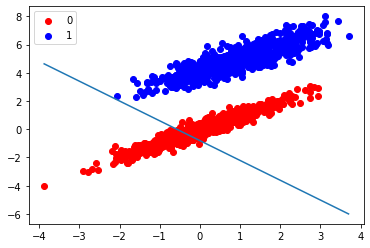

In [20]:
w = np.random.rand(len(x_train[0]))

show_plt(w, x_train, y_train)

The weights are: [-1571.62826666 -1105.33492813  1474.79667778]


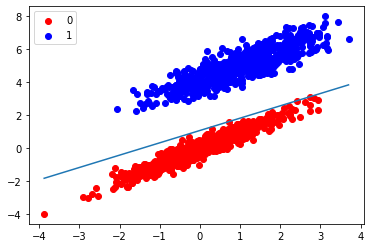

In [21]:
w, min_epoch = train_perceptron(w, x_train, y_train)

print("The weights are:", w)

# Do not change -->
lab1_student_answer_w2 = w
lab1_stduent_answer_min_epoch = min_epoch
# <--
show_plt(w, x_train, y_train)

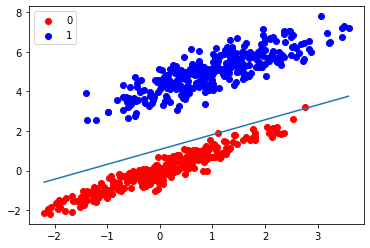

In [22]:
show_plt(w, x_test, y_test)

## Practice 3

hyperplane이 구해지는 최소 epoch를 줄일 수 있도록 train_perceptron 코드를 수정하시오.

In [23]:
# Todo: practice 3
def train_perceptron(w, x, y, epoch=30):#w는 weight, x는 x_train, y는 y_train으로 label 값
    #learning_rate 사용 빼고 practice2와 같은 코드
    min_epoch = epoch#weight update 끝나는 최소 epoch
    epoch_update_flag=0#min_epoch 이미 구한 상황 알기 위한 parameter
    learning_rate=0.1
    #learning_rate는 학습률로써 초기값은 보통 0에서 1사이의 숫자를 선택
    #learning_rate를 weight에 대한 Error 변화율에 곱해서 weight를 update 시킨다
    #본 코드에서는 0.1로 설정하여 초기에는 작게 설정
    before_pos_cnt=-1#이전 epoch에서 제대로 분류되지 않은 y=1인 데이터의 개수 저장을 위한 parameter
    before_neg_cnt=-1#이전 epoch에서 제대로 분류되지 않은 y=-1인 데이터의 개수 저장을 위한 parameter
    for i in range(epoch):
        stopflag=1
        idx=0
        pos_cnt=0#현재 epoch에서 제대로 분류되지 않은 y=1인 데이터의 개수 저장 위한 parameter
        neg_cnt=0#현재 epoch에서 제대로 분류되지 않은 y=-1인 데이터의 개수 저장 위한 parameter
        misclassified_sum=np.zeros(len(x[0]))
        for sample in x:
            if y[idx]==0:
                wxy=-sample.dot(w.T)
                if wxy<0:#y=-1일때 제대로 분류되지 않은 경우
                    stopflag=0
                    misclassified_sum+=(-sample)
                    neg_cnt+=1#y=-1일때 제대로 분류되지 않은 경우의 개수를 증가
            else:
                wxy=sample.dot(w.T)
                if wxy<0:#y=1일때 제대로 분류되지 않은 경우
                    stopflag=0
                    misclassified_sum+=sample
                    pos_cnt+=1#y=1일때 제대로 분류되지 않은 경우의 개수를 증가
            idx+=1
        w+=learning_rate*misclassified_sum
        #practice2까지는 w+=misclassified_sum의 코드였지만 여기서는 learning_rate를 곱한 코드로 변경
        #learning_rate를 통해서 misclassified_sum, 즉, weight에 대한 Error의 변화율의 속도를 조절
        #weight는 decision boundary와 수직 관계로 있는데 이 weight를 이용하여 decision boundary를 조절하는 것이다
        #그런데 초기 상태에서는 학습되지 않은 weight를 사용하기 때문에 분류되지 않은 데이터가 많을 수도 있고 
        #안좋은 경우 decision boundary의 기울기의 절댓값이 커서 한쪽 class는 하나도 분류가 되지 않는 경우가 발생할 수 있다
        #따라서, misclassified_sum의 절댓값이 너무 커져서 weight update가 극단적으로 되는 경우가 발생할 수 있기 때문에
        #0과 1사이의 수를 learning_rate로 지정하여 misclassified_sum 값을 조정하여 weight를 update하게 된다.
        #이런 점을 이용하여 learning_rate를 misclassified_sum에 곱하는 코드를 작성
        if stopflag==1 and epoch_update_flag==0:
            min_epoch=i
            epoch_update_flag=1
        if stopflag==0:
            #생성되는 데이터의 형태를 보면 np.random.multivariate_normal를 사용하여 
            #y값이 0인 경우 (0,0)을 중심으로 하는 공분산, 1인 경우 (1, 5)를 중심으로 하는 공분산으로 지정되어 있다
            #따라서 매번 랜덤하게 생성되는 데이터는 비슷한 형태로 모여있게 된다.
            #그렇기 때문에 weight update가 진행되다가 한쪽 class만 완전히 분류가 되는 경우가 발생하게 되는데 
            #이런 경우 완전히 분류된 class 쪽으로 기울기를 기울이게 되면 분류가 마무리되는데 이때 learning_rate를 증가시켜서
            #학습되는 폭을 증가함으로써 weight update되는 속도를 증가시키게 된다.
            #또한, 단순히 한쪽 class만 완전히 분류되는 경우를 넘어서 이전에 분류되지 않은 개수보다 적어지는 경우까지 추가했다.
            #또한, 두 class 모두 일부가 분류되지 않은 경우에도 이전보다 분류되지 않은 데이터 수가 적어졌다면 그 방향이 맞다는 전제하에
            #learning_rate를 증가시켰다.
            #단, learning_rate가 너무 커지게 되면 진동을 하거나 overshooting이 발생할 수 있기 때문에 최대 0.8로 제한한다.
            if i!=0:
                #before_pos_cnt+before_neg_cnt>pos_cnt+neg_cnt: 이전에 분류되지 않은 개수보다 적어지는 경우
                #neg_cnt==0 and before_pos_cnt>pos_cnt: y=-1인 부분은 다 분류되고 y=1부분만 분류되지 않았을 때 이전 분류되지 않은 개수보다 적어지는 경우
                #pos_cnt==0 and before_neg_cnt>neg_cnt: y=1인 부분은 다 분류되고 y=-1부분만 분류되지 않았을 때 이전 분류되지 않은 개수보다 적어지는 경우
                if (before_pos_cnt+before_neg_cnt>pos_cnt+neg_cnt) or (neg_cnt==0 and before_pos_cnt>pos_cnt) or (pos_cnt==0 and before_neg_cnt>neg_cnt):
                    #또한, 매 epoch마다 증가시킬 경우와 2epoch마다 증가시키는 경우를 비교하여 더 성능이 좋은 경우를 채택했다
                    if i%2==0:
                        learning_rate=learning_rate*2
                    if learning_rate>0.8:
                        learning_rate=0.8
                before_pos_cnt=pos_cnt
                before_neg_cnt=neg_cnt
    if epoch_update_flag==0:#epoch 30까지 했는데 아직 분류되지 않은 데이터가 남은 경우
        #이 코드 역시 practice 2와 learning_rate 사용 여부만 빼고 같음
        tmp_w=w.copy()
        while(True):
            min_epoch+=1
            stopflag=1
            idx=0
            neg_cnt=0
            pos_cnt=0
            misclassified_sum=np.zeros(len(x[0]))
            #이 코드 역시 똑같이 weight를 update하고 learning_rate를 적용하는 코드이기 때문에 위의 코드와 동일
            for sample in x:
                if y[idx]==0:
                    wxy=-sample.dot(tmp_w.T)
                    if wxy<0:
                        stopflag=0
                        misclassified_sum+=(-sample)
                else:
                    wxy=sample.dot(tmp_w.T)
                    if wxy<0:
                        stopflag=0
                        misclassified_sum+=sample
                idx+=1
            tmp_w+=learning_rate*misclassified_sum
            if stopflag==1 and epoch_update_flag==0:
                break
            #단, 여기서는 learning_rate의 최댓값을 2로 지정, epoch 30안에 weight update가 완료되지 못했다는 것은
            #학습 정도가 작을 수도 있기 때문에 이 경우에는 방향성이 맞다면 learning_rate를 조금 더 크게 설정하여
            #학습이 조금 더 빨리 되도록 설정
            if stopflag==0:
                if (before_pos_cnt+before_neg_cnt>pos_cnt+neg_cnt) or (neg_cnt==0 and before_pos_cnt>pos_cnt) or (pos_cnt==0 and before_neg_cnt>neg_cnt):
                    if min_epoch%2==0:
                        learning_rate=learning_rate*2
                    if learning_rate>2:
                        learning_rate=2

    return w, min_epoch

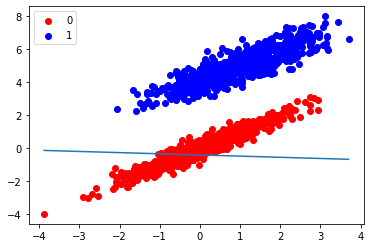

In [24]:
w = np.random.rand(len(x_train[0]))

show_plt(w, x_train, y_train)

The weights are: [-182.84346953 -127.51735893  129.01976971]


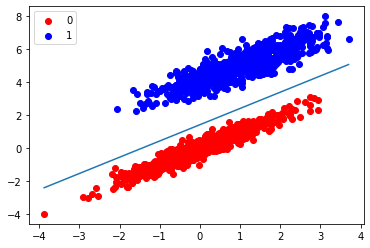

In [25]:
w, min_epoch = train_perceptron(w, x_train, y_train)

print("The weights are:", w)

# Do not change -->
lab1_student_answer_w3 = w
lab1_stduent_answer_min_epoch3 = min_epoch
# <--
show_plt(w, x_train, y_train)

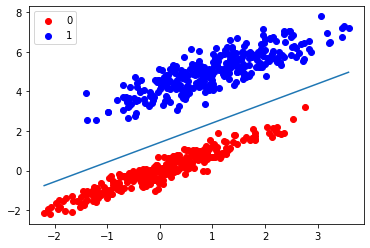

In [26]:
show_plt(w, x_test, y_test)

수고하셨습니다. 

조교메일: cvipsj@sogang.ac.kr

# 정답 확인용

수정금지 - 조교

In [27]:
print(f'학번: {lab1_student_id}')
print(f'이름: {lab1_student_name}')

학번: 20151519
이름: 고우준


In [28]:
print(f'Answer of practice 1: {abs(sum(lab1_student_answer_w - [-4.179, -2.512, 3.055])) < 0.01}')

Answer of practice 1: False


In [29]:
print(f'Answer of practice 2: {abs(sum(lab1_student_answer_w2 - [-6.628, -4.476, 5.423])) < 0.01}')
print(f'Min epochs at practice 2: {lab1_stduent_answer_min_epoch}')

Answer of practice 2: False
Min epochs at practice 2: 22


In [30]:
print(f'Answer of practice 2: {lab1_student_answer_w3}')
print(f'Min epochs at practice 2: {lab1_stduent_answer_min_epoch3}')

Answer of practice 2: [-182.84346953 -127.51735893  129.01976971]
Min epochs at practice 2: 6
